# ***About Author***

#### ***[JaberAlJ GitHub](https://github.com/JaberAlJ)***

# **Importing Libraries**
Import necessary libraries

In [53]:
# Import Basis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

# Model
from sklearn.naive_bayes import GaussianNB as GNB

# Model Evaluator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay as CMD

# **Dataset**

In [2]:
heart = pd.read_csv('heart_unclnData.csv')
heart.sample(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
254,NaN,M,ASY,145.0,248.0,0,Normal,96.0,Y,2.0,Flat,1
74,55.0,M,ASY,140.0,268.0,0,Normal,128.0,Y,1.5,Flat,1
574,69.0,M,ASY,142.0,210.0,1,ST,112.0,Y,1.5,Flat,1
147,43.0,F,ATA,120.0,249.0,0,ST,176.0,N,0.0,Up,0
382,43.0,M,ASY,115.0,0.0,0,Normal,145.0,Y,2.0,Flat,1
722,60.0,F,ASY,150.0,258.0,0,LVH,157.0,N,2.6,Flat,1
821,60.0,F,NAP,102.0,318.0,0,Normal,160.0,N,0.0,Up,0
465,42.0,M,NAP,134.0,240.0,0,Normal,160.0,N,0.0,Up,0
138,54.0,M,ASY,140.0,166.0,0,Normal,118.0,Y,0.0,Flat,1
911,59.0,m,ASY,164.0,176.0,1,LVH,90.0,N,1.0,Flat,1


### **About Dataset**
Cardiovascular diseases (CVDs) are the **number 1 cause of death globally💔**, taking an estimated **17.9 million lives each year🌍**, which accounts for **31% of all deaths worldwide**. Four out of 5CVD deaths are due to heart attacks and strokes💔💔, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs 💔and this dataset contains 11 features that can be used to predict a possible heart disease🩺.

🏥 People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need **early detection** and management wherein a machine learning model can be of great help🤖.

In [3]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             892 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       904 non-null    float64
 4   Cholesterol     901 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           901 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [4]:
heart.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,892.000000,918,918,904.000000,901.000000,918.000000,918,901.000000,918,918.000000,918,918.000000
unique,NaN,5,4,NaN,NaN,NaN,3,NaN,6,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,705,496,NaN,NaN,NaN,552,NaN,528,NaN,460,NaN
mean,53.618834,NaN,NaN,132.347345,199.139845,0.233115,NaN,136.734739,NaN,0.887364,NaN,0.553377
std,9.441913,NaN,NaN,18.399616,109.433625,0.423046,NaN,25.450772,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.000000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,155.000000,NaN,1.500000,NaN,1.000000


- `Age`: age of the patient **[years]**
- `Sex`: sex of the patient **[M: Male, F: Female]**
- `ChestPainType`: chest pain type **[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]**
- `RestingBP`: resting blood pressure **[mm Hg]**
- `Cholesterol`: serum cholesterol **[mm/dl]**
- `FastingBS`: fasting blood sugar *[1: if FastingBS > 120 mg/dl, 0: otherwise]*
- `RestingECG`: resting electrocardiogram results **[Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH`: showing probable or definite left ventricular hypertrophy by Estes' criteria]**
- `MaxHR`: maximum heart rate achieved **[Numeric value between 60 and 202]**
- `ExerciseAngina`: exercise-induced angina **[Y: Yes, N: No]**
- `Oldpeak`: oldpeak = ST **[Numeric value measured in depression]**
- `ST_Slope`: the slope of the peak exercise ST segment **[Up: upsloping, Flat: flat, Down: downsloping]**
----
- `HeartDisease`: output class **[1: heart disease, 0: Normal]**

# **Data Preprocessing**

### **Uniques Values**
Review all **uniques** values in each column in the dataset

In [5]:
for col in heart.columns:
    print("-"*30)
    print(f"{col} = {heart[col].unique()}\n")

------------------------------
Age = [40. 49. 37. 48. 54. nan 45. 58. 39. 42. 38. 43. 60. 36. 44. 53. 52. 51.
 56. 41. 32. 65. 35. 59. 50. 47. 31. 46. 57. 55. 63. 66. 34. 33. 61. 29.
 62. 28. 30. 74. 68. 72. 64. 69. 67. 73. 70. 77. 75. 76. 71.]

------------------------------
Sex = ['M' 'F' 'f ' 'm ' 'm']

------------------------------
ChestPainType = ['ATA' 'NAP' 'ASY' 'TA']

------------------------------
RestingBP = [140. 160. 130. 138. 150. 120. 110. 136. 115. 100. 124. 113. 125. 145.
 112. 132. 118. 170. 142.  nan 190. 135. 180. 108. 155. 128. 106.  92.
 200. 122.  98. 105. 133.  95.  80. 137. 185. 165. 126. 152. 116.   0.
 144. 154. 134. 104. 139. 131. 141. 178. 146. 158. 123. 102.  96. 143.
 172. 114. 127. 101. 174. 156.  94. 148. 117. 129. 164.]

------------------------------
Cholesterol = [289. 180. 283. 214. 195. 339. 237. 208. 207. 284. 211. 164. 204. 234.
 273. 196. 201. 248. 267. 223. 184. 288. 215. 209. 260. 468. 188. 518.
 167. 224. 172. 186. 254. 306. 250. 177. 227. 2

### **Null Values**
Check for any null values

In [6]:
heart.isna().values.any()

True

Count **null** values in each column

In [7]:
heart.isna().sum()

Age               26
Sex                0
ChestPainType      0
RestingBP         14
Cholesterol       17
FastingBS          0
RestingECG         0
MaxHR             17
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
HeartDisease       0
dtype: int64

## 1. **Data Cleaning**
Data cleaning for each column

In [8]:
# `Age` col
mean_age = int(heart['Age'].mean())
heart['Age'].fillna(mean_age, inplace=True)

In [9]:
# `Sex` col
heart['Sex'] = heart['Sex'].str.strip()
heart['Sex'] = heart['Sex'].str.upper()

In [10]:
# `RestingBP` col
mean_rbp = int(heart['RestingBP'].mean())
heart['RestingBP'].fillna(mean_rbp, inplace=True)

In [11]:
# `Cholesterol` col
mean_cost = int(heart['Cholesterol'].mean())
heart['Cholesterol'].fillna(mean_cost, inplace=True)

In [12]:
# `MaxHR` col
mean_mHR = int(heart['MaxHR'].mean())
heart['MaxHR'].fillna(mean_mHR, inplace=True)

In [13]:
# `ExerciseAngina` col
heart['ExerciseAngina'] = heart['ExerciseAngina'].str.strip()
heart['ExerciseAngina'] = heart['ExerciseAngina'].str.upper()

In [14]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


In [15]:
for col in heart.columns:
    print("-"*30)
    print(f"{col} = {heart[col].unique()}\n")

------------------------------
Age = [40. 49. 37. 48. 54. 53. 45. 58. 39. 42. 38. 43. 60. 36. 44. 52. 51. 56.
 41. 32. 65. 35. 59. 50. 47. 31. 46. 57. 55. 63. 66. 34. 33. 61. 29. 62.
 28. 30. 74. 68. 72. 64. 69. 67. 73. 70. 77. 75. 76. 71.]

------------------------------
Sex = ['M' 'F']

------------------------------
ChestPainType = ['ATA' 'NAP' 'ASY' 'TA']

------------------------------
RestingBP = [140. 160. 130. 138. 150. 120. 110. 136. 115. 100. 124. 113. 125. 145.
 112. 132. 118. 170. 142. 190. 135. 180. 108. 155. 128. 106.  92. 200.
 122.  98. 105. 133.  95.  80. 137. 185. 165. 126. 152. 116.   0. 144.
 154. 134. 104. 139. 131. 141. 178. 146. 158. 123. 102.  96. 143. 172.
 114. 127. 101. 174. 156.  94. 148. 117. 129. 164.]

------------------------------
Cholesterol = [289. 180. 283. 214. 195. 339. 237. 208. 207. 284. 211. 164. 204. 234.
 273. 196. 201. 248. 267. 223. 184. 288. 215. 209. 260. 468. 188. 518.
 167. 224. 172. 186. 254. 306. 250. 177. 227. 230. 294. 264. 259. 175.

## 2. **Data Encoding**
Data encoding for the **categorical variables**

In [16]:
# `Sex` col
heart['Sex'].replace({'M': 0, 'F': 1}, inplace=True)
heart['Sex'] = heart['Sex'].astype('int64')

In [17]:
# `ChestPainType` col
heart['ChestPainType'].replace({'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3}, inplace=True)
heart['ChestPainType'] = heart['ChestPainType'].astype('int64')

In [18]:
# `RestingECG` col
heart['RestingECG'].replace({'Normal': 0, 'ST': 1, 'LVH': 2}, inplace=True)
heart['RestingECG'] = heart['RestingECG'].astype('int64')

In [19]:
# `ExerciseAngina` col
heart['ExerciseAngina'].replace({'Y': 0, 'N': 1}, inplace=True)
heart['ExerciseAngina'] = heart['ExerciseAngina'].astype('int64')

In [20]:
# `ST_Slope` col
heart['ST_Slope'].replace({'Up': 0, 'Flat': 1, 'Down': 2}, inplace=True)
heart['ST_Slope'] = heart['ST_Slope'].astype('int64')

In [21]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 86.2 KB


In [22]:
for col in heart.columns:
    print("-"*30)
    print(f"{col} = {heart[col].unique()}\n")

------------------------------
Age = [40. 49. 37. 48. 54. 53. 45. 58. 39. 42. 38. 43. 60. 36. 44. 52. 51. 56.
 41. 32. 65. 35. 59. 50. 47. 31. 46. 57. 55. 63. 66. 34. 33. 61. 29. 62.
 28. 30. 74. 68. 72. 64. 69. 67. 73. 70. 77. 75. 76. 71.]

------------------------------
Sex = [0 1]

------------------------------
ChestPainType = [1 2 3 0]

------------------------------
RestingBP = [140. 160. 130. 138. 150. 120. 110. 136. 115. 100. 124. 113. 125. 145.
 112. 132. 118. 170. 142. 190. 135. 180. 108. 155. 128. 106.  92. 200.
 122.  98. 105. 133.  95.  80. 137. 185. 165. 126. 152. 116.   0. 144.
 154. 134. 104. 139. 131. 141. 178. 146. 158. 123. 102.  96. 143. 172.
 114. 127. 101. 174. 156.  94. 148. 117. 129. 164.]

------------------------------
Cholesterol = [289. 180. 283. 214. 195. 339. 237. 208. 207. 284. 211. 164. 204. 234.
 273. 196. 201. 248. 267. 223. 184. 288. 215. 209. 260. 468. 188. 518.
 167. 224. 172. 186. 254. 306. 250. 177. 227. 230. 294. 264. 259. 175.
 318. 216. 340. 23

# **Algorithm**

## 1. **Dividing the Data**
Dividing the data into X, y 
- ***X***: the features 
- ***y*** : the target 🎯 

In [23]:
X = heart.iloc[:, :-1].values
y = heart.iloc[:, -1].values

In [24]:
X

array([[40. ,  0. ,  1. , ...,  1. ,  0. ,  0. ],
       [49. ,  1. ,  2. , ...,  1. ,  1. ,  1. ],
       [37. ,  0. ,  1. , ...,  1. ,  0. ,  0. ],
       ...,
       [57. ,  0. ,  3. , ...,  0. ,  1.2,  1. ],
       [57. ,  1. ,  1. , ...,  1. ,  0. ,  1. ],
       [38. ,  0. ,  2. , ...,  1. ,  0. ,  0. ]])

In [25]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

## 2. **Splitting the Data into Train/Test**

In [26]:
# For model-1
(X1_train, X1_test, y1_train, y1_test) = train_test_split(X, y, test_size=.2)

# For model-2
(X2_train, X2_test, y2_train, y2_test) = train_test_split(X, y, test_size=.2)

In [27]:
# Model-1
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((734, 11), (184, 11), (734,), (184,))

In [28]:
# Model-2
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((734, 11), (184, 11), (734,), (184,))

## 3. **Building and Training the Models**

In [29]:
# Building model-1
nb_clf1 = GNB()

# Fitting model-1
nb_clf1.fit(X1_train, y1_train)

GaussianNB()

In [30]:
# Building model-2
nb_clf2 = GNB(
    var_smoothing=1e-8  # adds a small value to the variance to avoid division by zero. (default value is 1e-9)
)

# Fitting model-2
nb_clf2.fit(X2_train, y2_train)

GaussianNB(var_smoothing=1e-08)

## 4. **Testing the Models**

In [31]:
# Model-1
y1_pred = nb_clf1.predict(X1_test)
y1_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0], dtype=int64)

In [32]:
# Model-2
y2_pred = nb_clf2.predict(X2_test)
y2_pred

array([1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

# **Interpretation of Results**

## 1. **Cross Validated Accuracy Score**

In [33]:
# Model-1
cvs = cross_val_score(nb_clf1, X, y, cv=3, scoring="accuracy")
print(f"Cross Validated Accuracy Score for `Model-1`: {cvs}")
print(f"Mean Accuracy for `Model-1`: {cvs.mean()}")

Cross Validated Accuracy Score for `Model-1`: [0.8627451  0.83986928 0.78431373]
Mean Accuracy for `Model-1`: 0.8289760348583878


In [34]:
# Model-2
cvs = cross_val_score(nb_clf2, X, y, cv=3, scoring="accuracy")
print(f"Cross Validated Accuracy Score for `Model-2`: {cvs}")
print(f"Mean Accuracy for `Model-2`: {cvs.mean()}")

Cross Validated Accuracy Score for `Model-2`: [0.8627451  0.83986928 0.78431373]
Mean Accuracy for `Model-2`: 0.8289760348583878


## 2. **Confusion Matrix**

In [35]:
# Model-1
Conf_M1 = confusion_matrix(y1_test, y1_pred)
Conf_M1

array([[72, 15],
       [14, 83]], dtype=int64)

In [36]:
# Model-2
Conf_M2 = confusion_matrix(y2_test, y2_pred)
Conf_M2

array([[78, 16],
       [11, 79]], dtype=int64)

## 3. **Accuracy Score**

In [37]:
# Model-1
Ac_S1 = accuracy_score(y_true= y1_test, y_pred= y1_pred)
Ac_S1

0.842391304347826

In [38]:
# Model-2
Ac_S2 = accuracy_score(y_true= y2_test, y_pred= y2_pred)
Ac_S2

0.8532608695652174

## 4. **Predicting**
Use the classifier to predict output base on new data

----------

- `Age`: age of the patient **[years]**
- `Sex`: sex of the patient **[0: Male, 1: Female]**
- `ChestPainType`: chest pain type **[0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic]**
- `RestingBP`: resting blood pressure **[mm Hg]**
- `Cholesterol`: serum cholesterol **[mm/dl]**
- `FastingBS`: fasting blood sugar **[1: if FastingBS > 120 mg/dl, 0: otherwise]**
- `RestingECG`: resting electrocardiogram results **[0: Normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2`: showing probable or definite left ventricular hypertrophy by Estes' criteria]**
- `MaxHR`: maximum heart rate achieved **[Numeric value between 60 and 202]**
- `ExerciseAngina`: exercise-induced angina **[0: Yes, 1: No]**
- `Oldpeak`: oldpeak = ST **[Numeric value measured in depression]**
- `ST_Slope`: the slope of the peak exercise ST segment **[0: upsloping, 1: flat, 2: downsloping]**
----
- `HeartDisease`: output class **[1: heart disease, 0: Normal]**

In [39]:
# Model-1
y_new = nb_clf1.predict([[60, 1, 1, 130, 220, 1, 0, 160, 0, 2.3, 2]])
y_new

array([1], dtype=int64)

In [40]:
# Model-2
y_new = nb_clf2.predict([[55, 0, 2, 140, 250, 0, 1, 150, 1, 1.5, 1]])
y_new

array([1], dtype=int64)

# **Visualization**

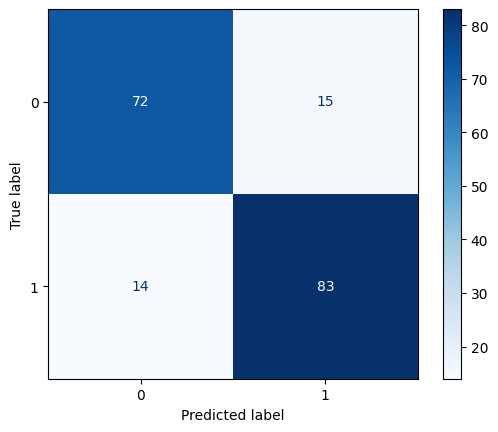

In [55]:
# Plot confusion matrix for Model -1
disp = CMD(confusion_matrix=Conf_M1)
disp.plot(cmap='Blues')
plt.show()

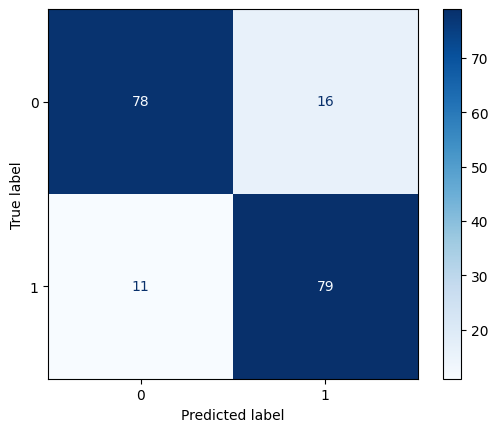

In [56]:
# Plot confusion matrix for Model -2
disp = CMD(confusion_matrix=Conf_M2)
disp.plot(cmap='Blues')
plt.show()

# **Model's Performance and Evaluation**

- **Model 1** has an `accuracy of approximately 84.2%`, `precision of 84.7%`, `recall of 85.6%`, and `F1 score of 85.1%`.
- **Model 2** has an `accuracy of approximately 85.3%`, `precision of 83.2%`, `recall of 87.8%`, and `F1 score of 85.4%`.

-----

Model 2 slightly outperforms Model 1 in terms of accuracy, recall, and F1 score, making it the better model overall.